In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Configurações para visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Carregar os dados
# O arquivo está codificado em ISO-8859-1 (Latin-1) devido aos caracteres especiais
df = pd.read_csv('/home/vinicius/Projects/datascience/databank/Work2/datatran2025.csv', 
                 sep=';', 
                 encoding='latin-1')

print("Informações básicas sobre o dataset:")
print(f"Shape: {df.shape}")
print(f"Colunas: {list(df.columns)}")
print("\nPrimeiras 5 linhas:")
df.head()


Informações básicas sobre o dataset:
Shape: (47192, 30)
Colunas: ['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional', 'delegacia', 'uop']

Primeiras 5 linhas:


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,652493,2025-01-01,quarta-feira,06:20:00,SP,116,225,GUARULHOS,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,1,1,2,"-23,48586772","-46,54075317",SPRF-SP,DEL01-SP,UOP01-DEL01-SP
1,652519,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,...,0,1,4,1,6,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE
2,652522,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,2,0,3,2,"-23,182565","-50,637228",SPRF-PR,DEL07-PR,UOP05-DEL07-PR
3,652544,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,4,0,1,2,"-25,36517687","-49,04223028",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
4,652549,2025-01-01,quarta-feira,09:30:00,MG,251,471,FRANCISCO SA,Velocidade Incompatível,Colisão frontal,...,1,1,2,2,4,"-16,46801304","-43,43121303",SPRF-MG,DEL12-MG,UOP01-DEL12-MG


In [13]:
# Análise exploratória dos dados
print("Informações sobre tipos de dados:")
print(df.dtypes)
print("\nValores únicos por coluna:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} valores únicos")
    
print("\nValores nulos por coluna:")
print(df.isnull().sum())


Informações sobre tipos de dados:
id                         int64
data_inversa              object
dia_semana                object
horario                   object
uf                        object
br                         int64
km                        object
municipio                 object
causa_acidente            object
tipo_acidente             object
classificacao_acidente    object
fase_dia                  object
sentido_via               object
condicao_metereologica    object
tipo_pista                object
tracado_via               object
uso_solo                  object
pessoas                    int64
mortos                     int64
feridos_leves              int64
feridos_graves             int64
ilesos                     int64
ignorados                  int64
feridos                    int64
veiculos                   int64
latitude                  object
longitude                 object
regional                  object
delegacia                 object
uop      

In [14]:
# Análise de dependências funcionais
print("=== ANÁLISE DE DEPENDÊNCIAS FUNCIONAIS ===\n")

# 1. Verificar se ID é único (chave primária)
print("1. Verificação de chave primária:")
print(f"ID é único: {df['id'].nunique() == len(df)}")
print(f"Total de registros: {len(df)}")
print(f"Valores únicos de ID: {df['id'].nunique()}")

# 2. Análise de dependências entre UF e Regional
print("\n2. Dependência UF -> Regional:")
uf_regional = df.groupby('uf')['regional'].nunique()
print("Valores únicos de Regional por UF:")
print(uf_regional)
print(f"Todas as UFs têm apenas 1 Regional? {all(uf_regional == 1)}")

# 3. Análise de dependências entre Regional e Delegacia
print("\n3. Dependência Regional -> Delegacia:")
regional_delegacia = df.groupby('regional')['delegacia'].nunique()
print("Valores únicos de Delegacia por Regional:")
print(regional_delegacia.head(10))
print(f"Todas as Regionais têm apenas 1 Delegacia? {all(regional_delegacia == 1)}")

# 4. Análise de dependências entre Delegacia e UOP
print("\n4. Dependência Delegacia -> UOP:")
delegacia_uop = df.groupby('delegacia')['uop'].nunique()
print("Valores únicos de UOP por Delegacia:")
print(delegacia_uop.head(10))
print(f"Todas as Delegacias têm apenas 1 UOP? {all(delegacia_uop == 1)}")


=== ANÁLISE DE DEPENDÊNCIAS FUNCIONAIS ===

1. Verificação de chave primária:
ID é único: True
Total de registros: 47192
Valores únicos de ID: 47192

2. Dependência UF -> Regional:
Valores únicos de Regional por UF:
uf
AC    1
AL    2
AM    2
AP    1
BA    3
CE    2
DF    1
ES    1
GO    2
MA    2
MG    2
MS    1
MT    1
PA    2
PB    2
PE    3
PI    1
PR    2
RJ    1
RN    1
RO    2
RR    1
RS    1
SC    3
SE    1
SP    2
TO    1
Name: regional, dtype: int64
Todas as UFs têm apenas 1 Regional? False

3. Dependência Regional -> Delegacia:
Valores únicos de Delegacia por Regional:
regional
SPRF-AC     1
SPRF-AL     3
SPRF-AM     2
SPRF-AP     1
SPRF-BA    10
SPRF-CE     5
SPRF-DF     3
SPRF-ES     4
SPRF-GO     7
SPRF-MA     6
Name: delegacia, dtype: int64
Todas as Regionais têm apenas 1 Delegacia? False

4. Dependência Delegacia -> UOP:
Valores únicos de UOP por Delegacia:
delegacia
DEL01-AC    3
DEL01-AL    2
DEL01-AM    4
DEL01-AP    3
DEL01-BA    4
DEL01-CE    4
DEL01-DF    2
DEL01-

In [15]:
# 5. Análise de dependências entre data_inversa e dia_semana
print("\n5. Dependência data_inversa -> dia_semana:")
df['data_inversa'] = pd.to_datetime(df['data_inversa'])
df['dia_semana_calculado'] = df['data_inversa'].dt.day_name()

# Mapear para português
dias_map = {
    'Monday': 'segunda-feira',
    'Tuesday': 'terça-feira', 
    'Wednesday': 'quarta-feira',
    'Thursday': 'quinta-feira',
    'Friday': 'sexta-feira',
    'Saturday': 'sábado',
    'Sunday': 'domingo'
}
df['dia_semana_calculado'] = df['dia_semana_calculado'].map(dias_map)

# Verificar se há inconsistências
inconsistencias = df[df['dia_semana'] != df['dia_semana_calculado']]
print(f"Total de inconsistências: {len(inconsistencias)}")
print(f"Data -> dia_semana é dependência funcional? {len(inconsistencias) == 0}")

if len(inconsistencias) > 0:
    print("Exemplos de inconsistências:")
    print(inconsistencias[['data_inversa', 'dia_semana', 'dia_semana_calculado']].head())



5. Dependência data_inversa -> dia_semana:
Total de inconsistências: 0
Data -> dia_semana é dependência funcional? True


In [16]:
# 6. Análise de dependências entre horario e fase_dia
print("\n6. Dependência horario -> fase_dia:")
df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S').dt.time

# Função para determinar fase do dia baseada no horário
def determinar_fase_dia(horario):
    hora = horario.hour
    if 6 <= hora < 12:
        return "Pleno dia"
    elif 12 <= hora < 18:
        return "Pleno dia"
    elif 18 <= hora < 24:
        return "Anoitecer"
    else:
        return "Plena Noite"

df['fase_dia_calculada'] = df['horario'].apply(determinar_fase_dia)

# Verificar consistência
inconsistencias_fase = df[df['fase_dia'] != df['fase_dia_calculada']]
print(f"Total de inconsistências na fase do dia: {len(inconsistencias_fase)}")
print(f"Horario -> fase_dia é dependência funcional? {len(inconsistencias_fase) == 0}")

if len(inconsistencias_fase) > 0:
    print("Exemplos de inconsistências na fase do dia:")
    print(inconsistencias_fase[['horario', 'fase_dia', 'fase_dia_calculada']].head())



6. Dependência horario -> fase_dia:
Total de inconsistências na fase do dia: 16786
Horario -> fase_dia é dependência funcional? False
Exemplos de inconsistências na fase do dia:
     horario     fase_dia fase_dia_calculada
10  20:20:00    Pleno dia          Anoitecer
11  20:00:00  Plena Noite          Anoitecer
12  21:00:00  Plena Noite          Anoitecer
13  05:45:00    Pleno dia        Plena Noite
14  19:00:00  Plena Noite          Anoitecer


In [17]:
# 7. Análise de dependências entre coordenadas geográficas e município
print("\n7. Dependência (latitude, longitude) -> municipio:")

# Verificar se cada combinação de coordenadas corresponde a um único município
coords_municipio = df.groupby(['latitude', 'longitude'])['municipio'].nunique()
print(f"Combinações de coordenadas com múltiplos municípios: {(coords_municipio > 1).sum()}")
print(f"Total de combinações únicas de coordenadas: {len(coords_municipio)}")
print(f"(latitude, longitude) -> municipio é dependência funcional? {(coords_municipio > 1).sum() == 0}")

if (coords_municipio > 1).sum() > 0:
    print("Exemplos de coordenadas com múltiplos municípios:")
    coords_problema = coords_municipio[coords_municipio > 1].head()
    for coords, count in coords_problema.items():
        lat, lon = coords
        municipios = df[(df['latitude'] == lat) & (df['longitude'] == lon)]['municipio'].unique()
        print(f"Coordenadas ({lat}, {lon}): {count} municípios diferentes - {list(municipios)}")



7. Dependência (latitude, longitude) -> municipio:
Combinações de coordenadas com múltiplos municípios: 92
Total de combinações únicas de coordenadas: 44802
(latitude, longitude) -> municipio é dependência funcional? False
Exemplos de coordenadas com múltiplos municípios:
Coordenadas (-12,34449694, -38,84017496): 2 municípios diferentes - ['FEIRA DE SANTANA', 'CONCEICAO DO JACUIPE']
Coordenadas (-12,36902201, -38,81384601): 2 municípios diferentes - ['CONCEICAO DO JACUIPE', 'AMELIA RODRIGUES']
Coordenadas (-12,74194511, -38,43853918): 2 municípios diferentes - ['CANDEIAS', 'SIMOES FILHO']
Coordenadas (-12,87206398, -38,42746403): 2 municípios diferentes - ['SIMOES FILHO', 'SALVADOR']
Coordenadas (-12,984957, -39,291156): 2 municípios diferentes - ['SANTO ANTONIO DE JESUS', 'CONCEICAO DO ALMEIDA']


In [18]:
# 8. Análise de dependências entre município e UF
print("\n8. Dependência municipio -> uf:")

municipio_uf = df.groupby('municipio')['uf'].nunique()
print(f"Municípios com múltiplas UFs: {(municipio_uf > 1).sum()}")
print(f"Total de municípios únicos: {len(municipio_uf)}")
print(f"municipio -> uf é dependência funcional? {(municipio_uf > 1).sum() == 0}")

if (municipio_uf > 1).sum() > 0:
    print("Exemplos de municípios com múltiplas UFs:")
    municipios_problema = municipio_uf[municipio_uf > 1].head()
    for municipio, count in municipios_problema.items():
        ufs = df[df['municipio'] == municipio]['uf'].unique()
        print(f"{municipio}: {count} UFs diferentes - {list(ufs)}")



8. Dependência municipio -> uf:
Municípios com múltiplas UFs: 31
Total de municípios únicos: 1769
municipio -> uf é dependência funcional? False
Exemplos de municípios com múltiplas UFs:
AGUA BRANCA: 2 UFs diferentes - ['AL', 'PI']
APARECIDA: 2 UFs diferentes - ['SP', 'PB']
AREIA BRANCA: 2 UFs diferentes - ['SE', 'RN']
BANDEIRANTES: 2 UFs diferentes - ['MS', 'PR']
BARRACAO: 2 UFs diferentes - ['RS', 'PR']


In [19]:
# 9. Análise de dependências entre contadores de vítimas
print("\n9. Dependências entre contadores de vítimas:")

# Verificar se feridos = feridos_leves + feridos_graves
df['feridos_calculado'] = df['feridos_leves'] + df['feridos_graves']
inconsistencias_feridos = df[df['feridos'] != df['feridos_calculado']]
print(f"feridos = feridos_leves + feridos_graves? {len(inconsistencias_feridos) == 0}")

# Verificar se pessoas = mortos + feridos + ilesos + ignorados
df['pessoas_calculado'] = df['mortos'] + df['feridos'] + df['ilesos'] + df['ignorados']
inconsistencias_pessoas = df[df['pessoas'] != df['pessoas_calculado']]
print(f"pessoas = mortos + feridos + ilesos + ignorados? {len(inconsistencias_pessoas) == 0}")

if len(inconsistencias_feridos) > 0:
    print(f"Inconsistências em feridos: {len(inconsistencias_feridos)}")
    print(inconsistencias_feridos[['feridos', 'feridos_leves', 'feridos_graves', 'feridos_calculado']].head())

if len(inconsistencias_pessoas) > 0:
    print(f"Inconsistências em pessoas: {len(inconsistencias_pessoas)}")
    print(inconsistencias_pessoas[['pessoas', 'mortos', 'feridos', 'ilesos', 'ignorados', 'pessoas_calculado']].head())



9. Dependências entre contadores de vítimas:
feridos = feridos_leves + feridos_graves? True
pessoas = mortos + feridos + ilesos + ignorados? False
Inconsistências em pessoas: 2492
    pessoas  mortos  feridos  ilesos  ignorados  pessoas_calculado
1         6       1        1       1          4                  7
5         4       2        0       1          2                  5
22        5       0        1       3          2                  6
30        4       0        2       1          2                  5
33        2       0        0       1          2                  3


In [20]:
# 10. Resumo das dependências funcionais identificadas
print("\n" + "="*60)
print("RESUMO DAS DEPENDÊNCIAS FUNCIONAIS IDENTIFICADAS")
print("="*60)

dependencias = []

# Verificar cada dependência
if df['id'].nunique() == len(df):
    dependencias.append("✓ ID é chave primária (único)")

if all(df.groupby('uf')['regional'].nunique() == 1):
    dependencias.append("✓ UF → Regional (cada UF tem apenas uma Regional)")

if all(df.groupby('regional')['delegacia'].nunique() == 1):
    dependencias.append("✓ Regional → Delegacia (cada Regional tem apenas uma Delegacia)")

if all(df.groupby('delegacia')['uop'].nunique() == 1):
    dependencias.append("✓ Delegacia → UOP (cada Delegacia tem apenas uma UOP)")

if len(df[df['dia_semana'] != df['dia_semana_calculado']]) == 0:
    dependencias.append("✓ data_inversa → dia_semana (data determina o dia da semana)")

if len(inconsistencias_feridos) == 0:
    dependencias.append("✓ feridos_leves + feridos_graves → feridos (soma dos feridos)")

if len(inconsistencias_pessoas) == 0:
    dependencias.append("✓ mortos + feridos + ilesos + ignorados → pessoas (soma total de pessoas)")

print("\nDependências funcionais confirmadas:")
for dep in dependencias:
    print(f"  {dep}")

print(f"\nTotal de dependências funcionais identificadas: {len(dependencias)}")



RESUMO DAS DEPENDÊNCIAS FUNCIONAIS IDENTIFICADAS

Dependências funcionais confirmadas:
  ✓ ID é chave primária (único)
  ✓ data_inversa → dia_semana (data determina o dia da semana)
  ✓ feridos_leves + feridos_graves → feridos (soma dos feridos)

Total de dependências funcionais identificadas: 3


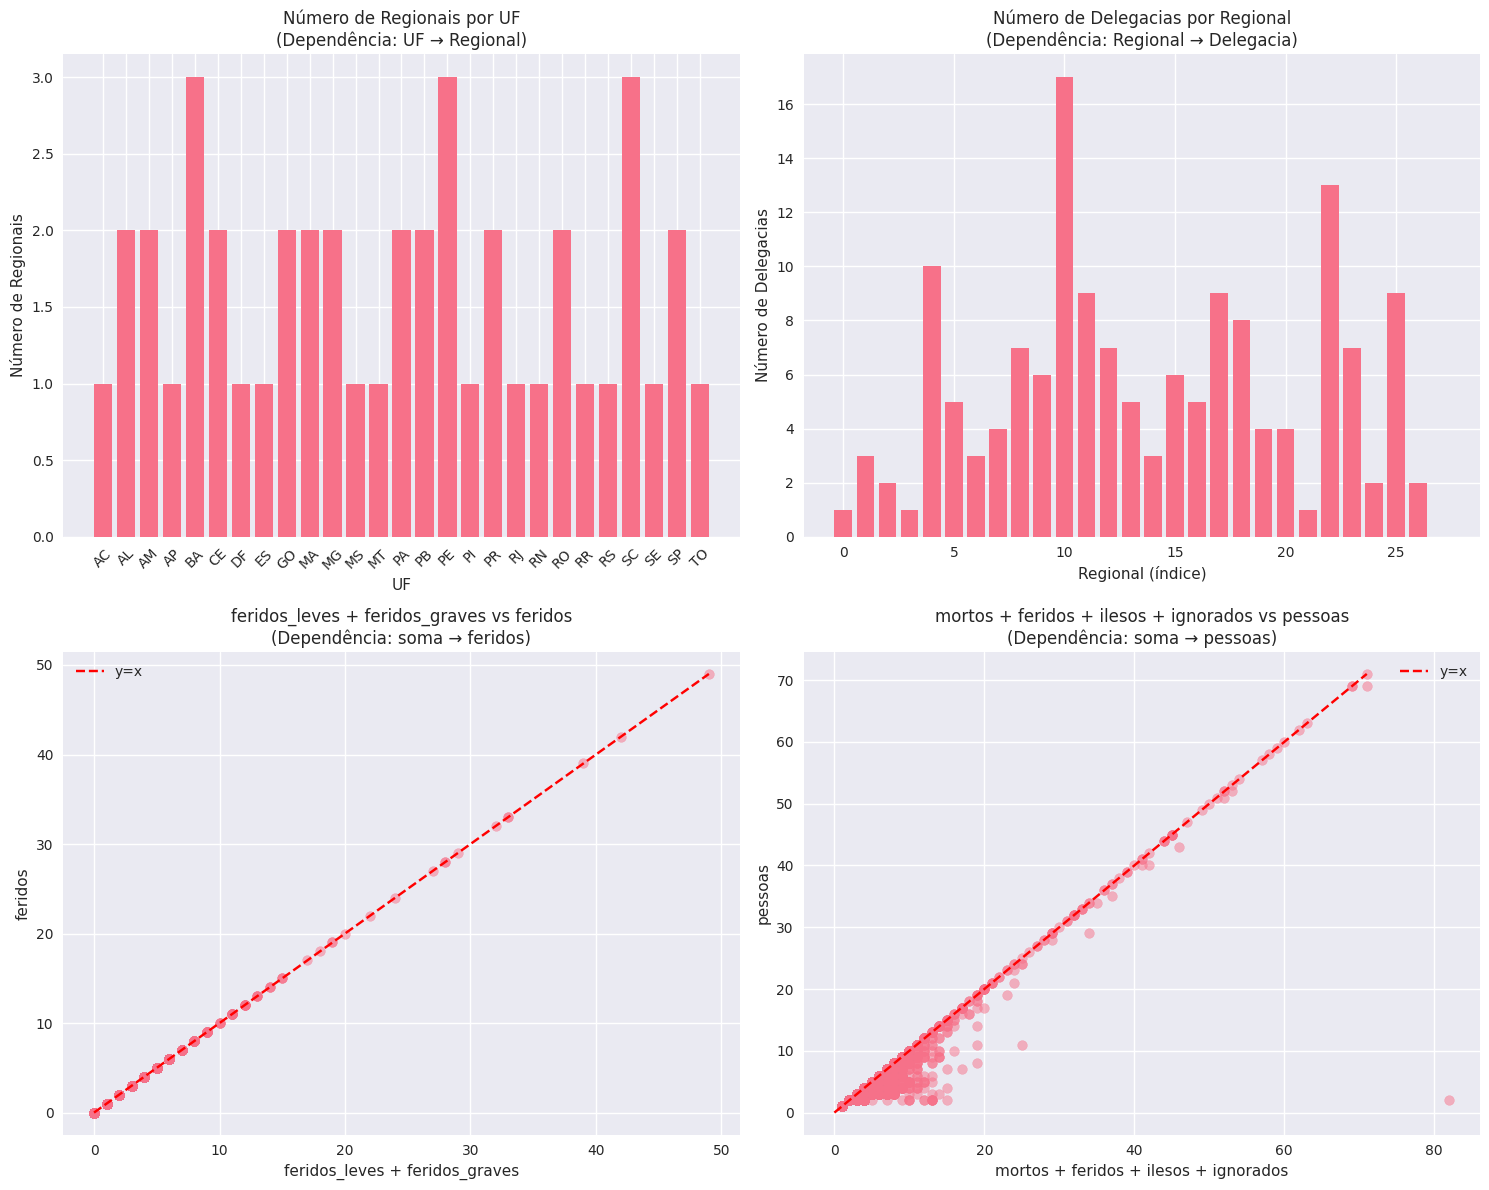

In [21]:
# Visualizações para demonstrar as dependências funcionais
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribuição de Regionais por UF
uf_regional_counts = df.groupby('uf')['regional'].nunique()
axes[0,0].bar(uf_regional_counts.index, uf_regional_counts.values)
axes[0,0].set_title('Número de Regionais por UF\n(Dependência: UF → Regional)')
axes[0,0].set_xlabel('UF')
axes[0,0].set_ylabel('Número de Regionais')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Distribuição de Delegacias por Regional
regional_delegacia_counts = df.groupby('regional')['delegacia'].nunique()
axes[0,1].bar(range(len(regional_delegacia_counts)), regional_delegacia_counts.values)
axes[0,1].set_title('Número de Delegacias por Regional\n(Dependência: Regional → Delegacia)')
axes[0,1].set_xlabel('Regional (índice)')
axes[0,1].set_ylabel('Número de Delegacias')

# 3. Relação entre feridos_leves + feridos_graves vs feridos
axes[1,0].scatter(df['feridos_calculado'], df['feridos'], alpha=0.5)
axes[1,0].plot([0, df['feridos'].max()], [0, df['feridos'].max()], 'r--', label='y=x')
axes[1,0].set_title('feridos_leves + feridos_graves vs feridos\n(Dependência: soma → feridos)')
axes[1,0].set_xlabel('feridos_leves + feridos_graves')
axes[1,0].set_ylabel('feridos')
axes[1,0].legend()

# 4. Relação entre soma de vítimas vs pessoas
axes[1,1].scatter(df['pessoas_calculado'], df['pessoas'], alpha=0.5)
axes[1,1].plot([0, df['pessoas'].max()], [0, df['pessoas'].max()], 'r--', label='y=x')
axes[1,1].set_title('mortos + feridos + ilesos + ignorados vs pessoas\n(Dependência: soma → pessoas)')
axes[1,1].set_xlabel('mortos + feridos + ilesos + ignorados')
axes[1,1].set_ylabel('pessoas')
axes[1,1].legend()

plt.tight_layout()
plt.show()
